### 只测试“新增点击量”作为label，因此需要新增一些“新增xx”的特征，但是又两列需要fillna(0),之前有一列用了fillna(method="bfill")

#### 读取训练集所有特征

In [2]:
import pandas as pd
original_df = pd.read_excel("./original_df.xlsx")

In [4]:
# original_df['当前小时新增弹幕数'] = original_df['当前小时新增弹幕数'].fillna(0)

In [7]:
# original_df['当前小时新增评分人数'] = original_df['当前小时新增评分人数'].fillna(0)

In [10]:
# original_df.to_csv("./original_df.csv")

In [29]:
# original_df.replace(-111111111.0, np.nan, inplace=True)
# original_df['当前小时评分人数'] = original_df['当前小时评分人数'].fillna(method="bfill")

In [21]:
X = original_df

In [11]:
original_df.columns

Index(['当前热度值', '新增热度值', '当前评论数', '新增评论数', '当前点赞数', '新增点赞数', '当前踩数', '新增踩数',
       '当前评分数', '当前小时新增弹幕数', '当前小时评分人数', '当前小时新增评分人数', '当日爱奇艺播放指数',
       'time_interval', '巴晨旭', '郭靖', '潘文杰', '朱锐斌', '唐顺风', '干志文', '薛少', '褚会林',
       '诸佳倩', '胡正兵', '张伟', '刘洋', '张浩', '李伟', '王伟', '张磊', '冯芷墨', '张涛',
       'is_weekday', '推广位-VIP', '推广位-无', '推广位-网大', '热度值新增百分比', 'week_monday',
       'week_tuesday', 'week_wednesday', 'week_thursday', 'week_friday',
       'week_saturday', 'week_sunday', '推广位等级_a', '推广位等级_b', '推广位等级_c',
       'time_partition_0', 'time_partition_1', 'time_partition_2', 'hour00',
       'hour01', 'hour02', 'hour03', 'hour04', 'hour05', 'hour06', 'hour07',
       'hour08', 'hour09', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14',
       'hour15', 'hour16', 'hour17', 'hour18', 'hour19', 'hour20', 'hour21',
       'hour22', 'hour23'],
      dtype='object')

#### 读取源数据，获得label

In [15]:
df = pd.read_csv("./data/filter_time_data.txt", sep='\t\t', header=None)

/home/wujiaocan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [18]:
df.columns = [ '电影ID','时间', '当前热度值', '新增热度值','当前点击量','新增点击量','当前评论数','新增评论数','当前点赞数','新增点赞数',
            '当前踩数','新增踩数','当前评分数','推广位','影片推广位等级','当前小时弹幕数','当前小时新增弹幕数','当前小时评分人数',
            '当前小时新增评分人数','当前小时五星评分人数','当前小时四星评分人数','当前小时三星评分人数','当前小时二星评分人数',
            '当前小时一星评分人数','当日爱奇艺播放指数','影片上线时间','导演','编剧','制片','美术','主演']

In [19]:
df['点击量新增百分比'] = df['新增点击量'][1:] / df['当前点击量'][:-1]
df['点击量新增百分比'] = df['点击量新增百分比'].fillna(0)

In [20]:
y_total = df['当前点击量']
y_new_add_amount = df['新增点击量']
y_new_add_percent = df['点击量新增百分比']

### 3. xgboost训练

#### Ⅰ 预测“新增点击量百分比”

MSE: 8.290823793036257e-08
RMSE: 0.00028793790637976545


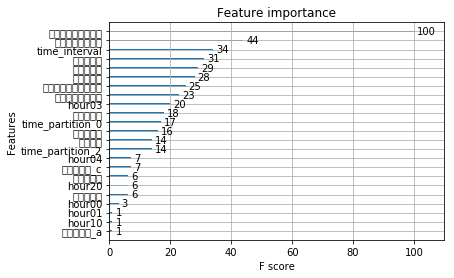

In [25]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# XGBoost训练过程
X_train, X_test, y_train, y_test = train_test_split(X, y_new_add_percent,test_size=0.2, random_state=0)

# model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:gamma')
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 对测试集进行预测
ans = model.predict(X_test)

# 显示误差
print("MSE:",metrics.mean_squared_error(y_test, ans))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, ans))) 

# 显示重要特征
plot_importance(model)
plt.show() 

##### Ⅱ 预测“新增点击量”，先保留暂时的所有特征，手动调参；

#### 1. 默认参数，rmse:1841

MSE: 3391244.321939989
RMSE: 1841.5331444044089


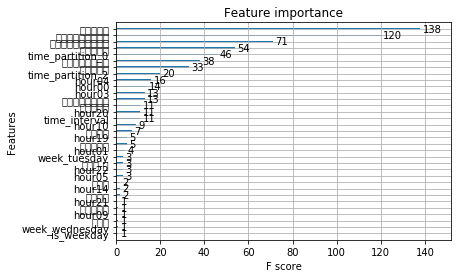

In [30]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# XGBoost训练过程
X_train, X_test, y_train, y_test = train_test_split(X, y_new_add_amount,test_size=0.2, random_state=0)

# model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:gamma')
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 对测试集进行预测
ans = model.predict(X_test)

# 显示误差
print("MSE:",metrics.mean_squared_error(y_test, ans))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, ans))) 

# 显示重要特征
plot_importance(model)
plt.show() 

#### 2. 

In [34]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV


def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    alg.fit(X_train, y_train, eval_metric="rmse")
    train_pred = alg.predict(X_train)
    print("现在这个模型")
    print("r2_score : %.4g" % metrics.r2_score(y_train, train_pred))
    
xgb1 = XGBRegressor(
        learning_rate = 0.1,
        max_depth = 3,
        min_child_weight = 1,
        n_estimator = 100
        )

In [37]:
?XGBRegressor

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new_add_amount,test_size=0.2, random_state=0)

modelfit(xgb1, X_train, y_train)

现在这个模型
r2_score : 0.4784


In [40]:
?GridSearchCV

In [55]:
param_test1 = {
        'max_depth':list(range(3,10,2)), 'min_child_weight':list(range(1,6,2))
}

In [56]:
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate = 0.1, n_estimator = 100),
                        param_grid=param_test1,
                        scoring="r2",
                        cv=5)

In [ ]:
gsearch1.fit(X_train, y_train)